In [16]:
import os, sys, numpy as np, matplotlib.pyplot as plt, matplotlib.colors, matplotlib.cm as cm 
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

home = os.path.abspath( os.getcwd() + "/.." )
sys.path.append(home)

from genam.configuration.source import ( 
  piston_model_matrix, 
  inlet_grid, 
  transducer_grid, 
  transducer_inlet_grid, 
  plotter, 
  write_complex_pressure_inlet, 
  configurator as source_configurator
)

D: 0.2    T_m_n: 8 1    M_m_n: 16 3


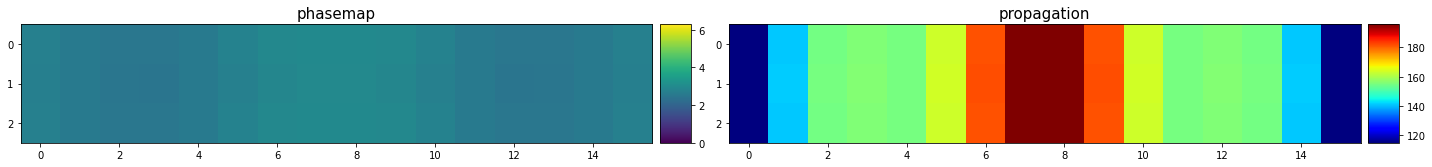

D: 0.02    T_m_n: 8 1    M_m_n: 16 3


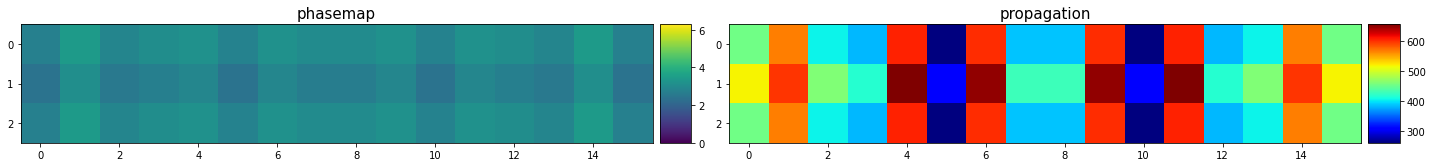

D: 0.002    T_m_n: 8 1    M_m_n: 16 3


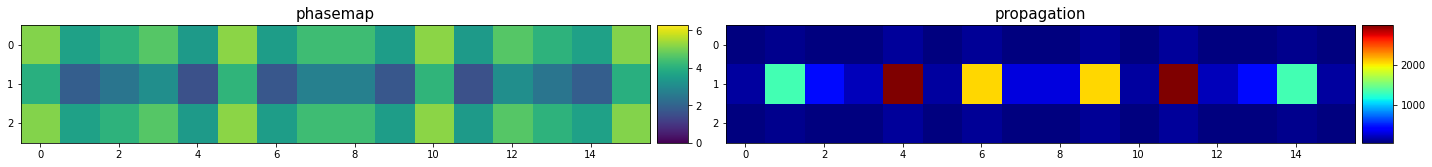

D: 0.2    T_m_n: 1 1    M_m_n: 1 1


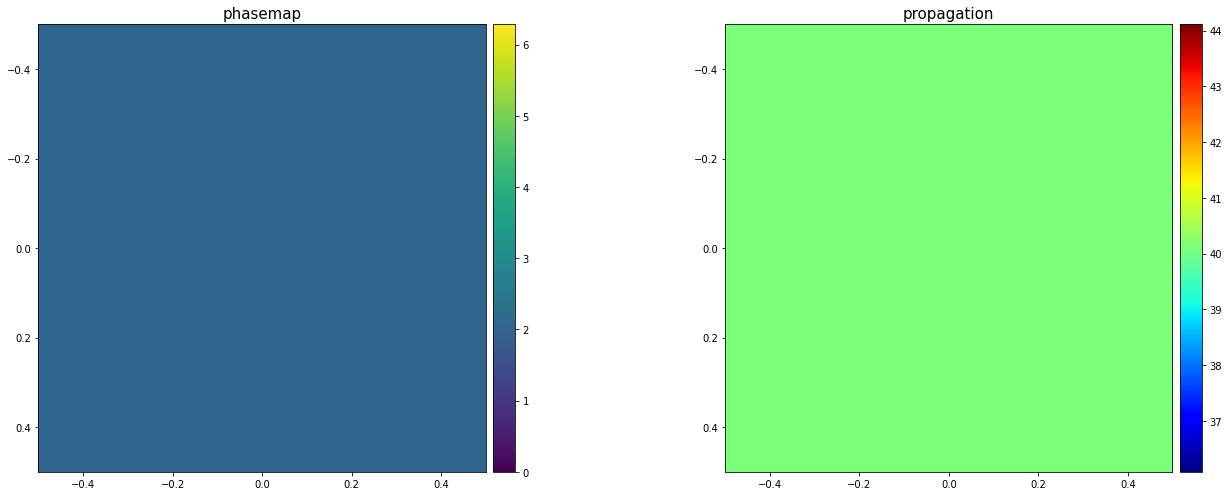

D: 0.02    T_m_n: 1 1    M_m_n: 1 1


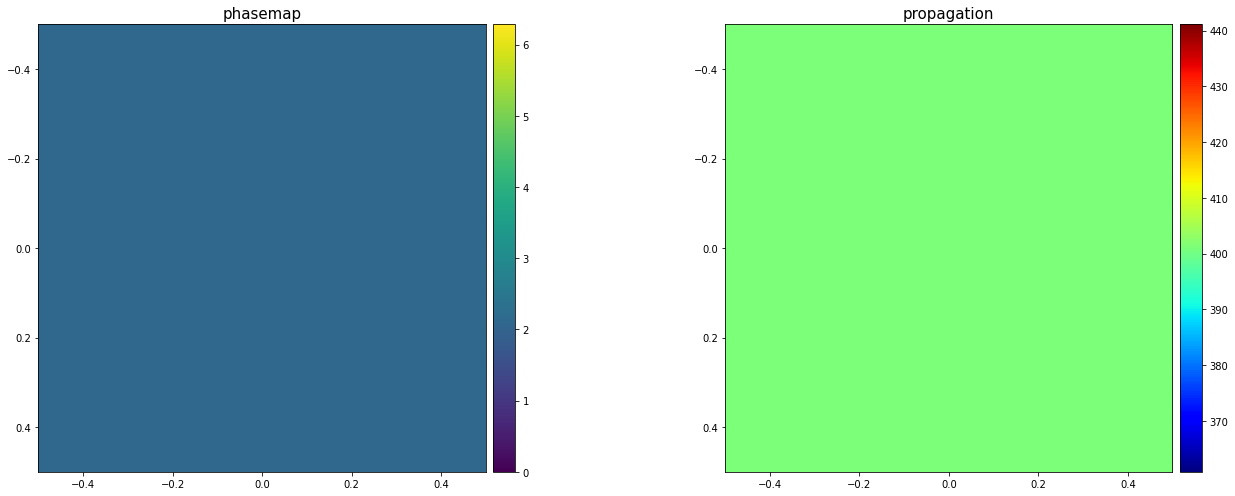

D: 0.002    T_m_n: 1 1    M_m_n: 1 1


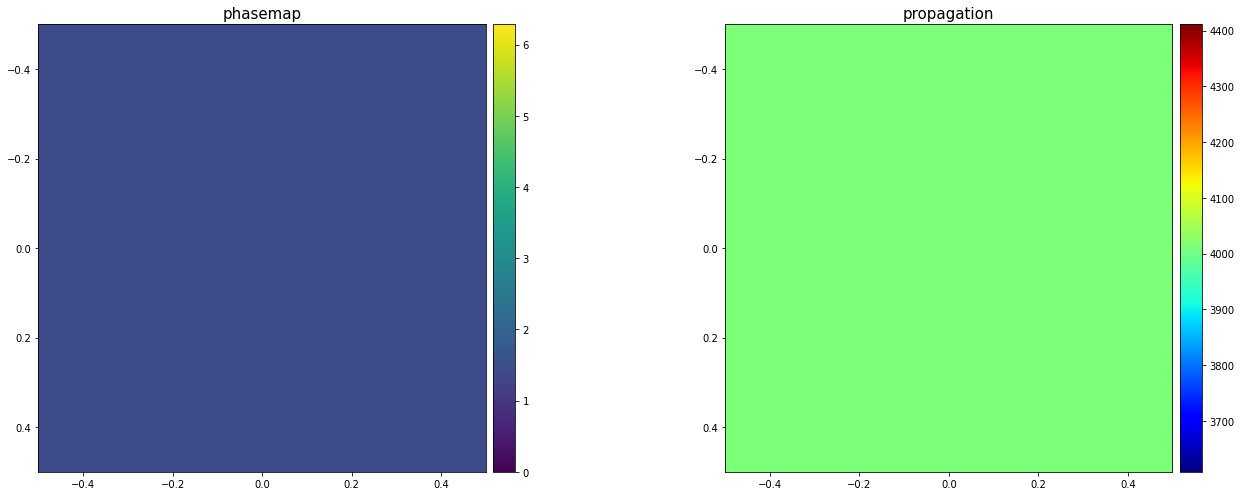

D: 0.2    T_m_n: 1 1    M_m_n: 2 2


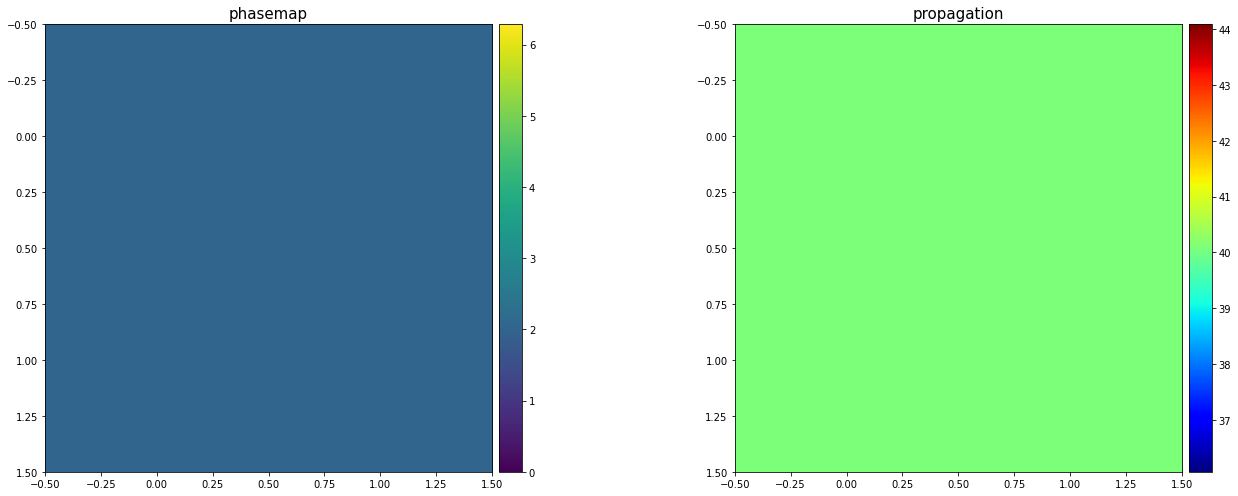

D: 0.02    T_m_n: 1 1    M_m_n: 2 2


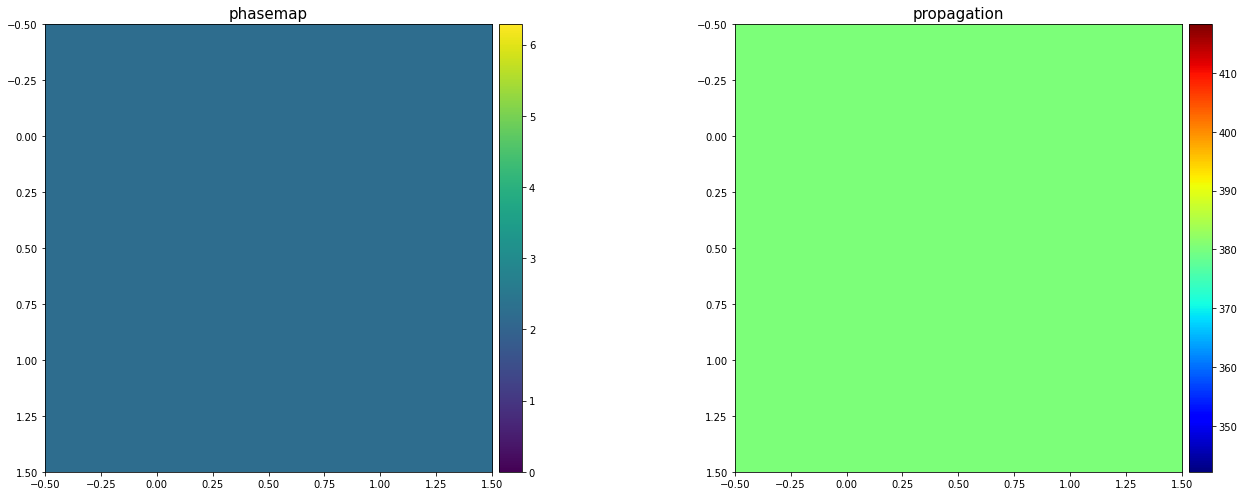

D: 0.002    T_m_n: 1 1    M_m_n: 2 2


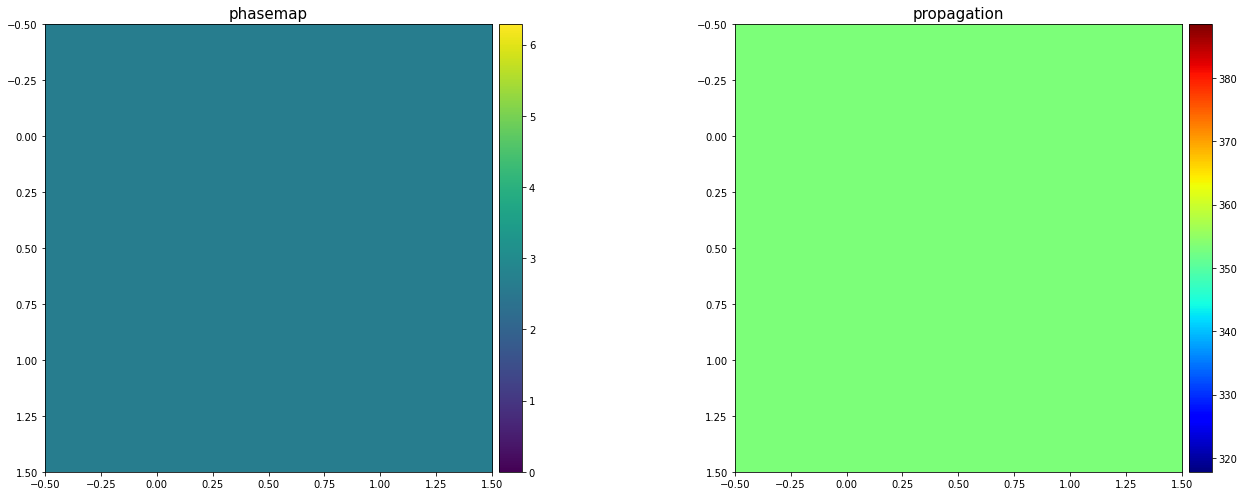

D: 0.2    T_m_n: 2 2    M_m_n: 2 2


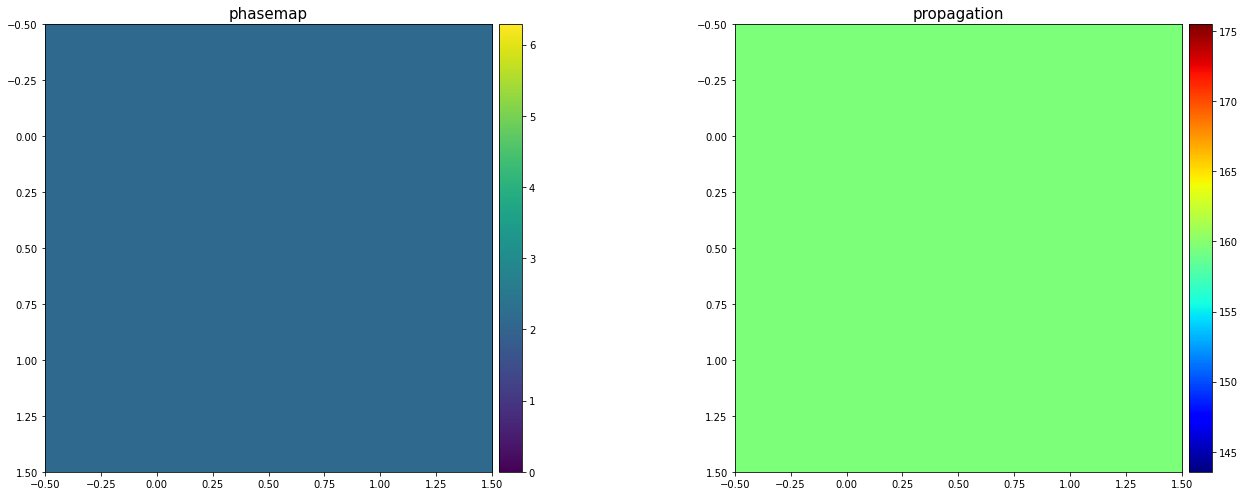

D: 0.02    T_m_n: 2 2    M_m_n: 2 2


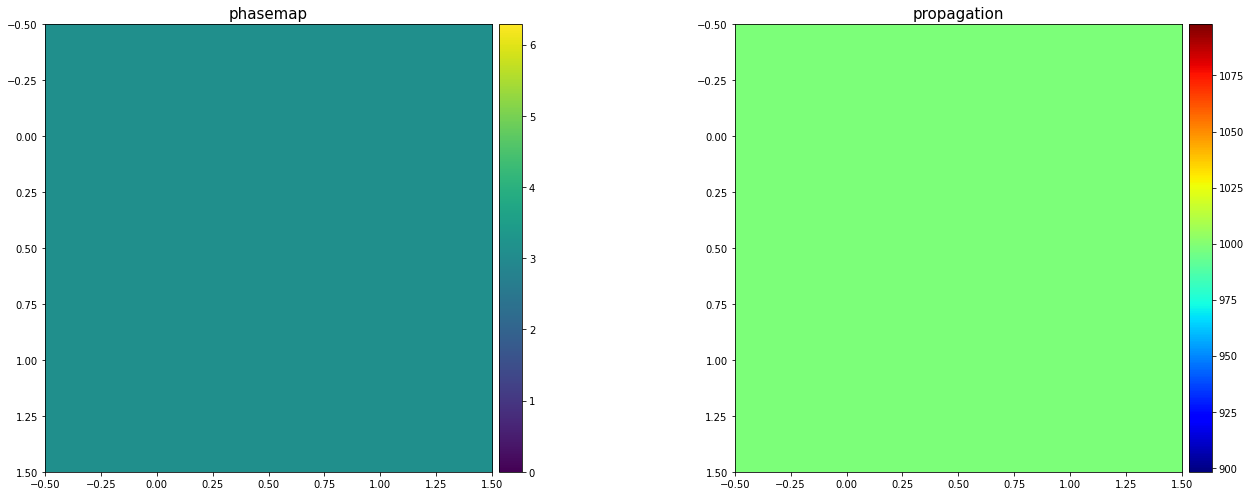

D: 0.002    T_m_n: 2 2    M_m_n: 2 2


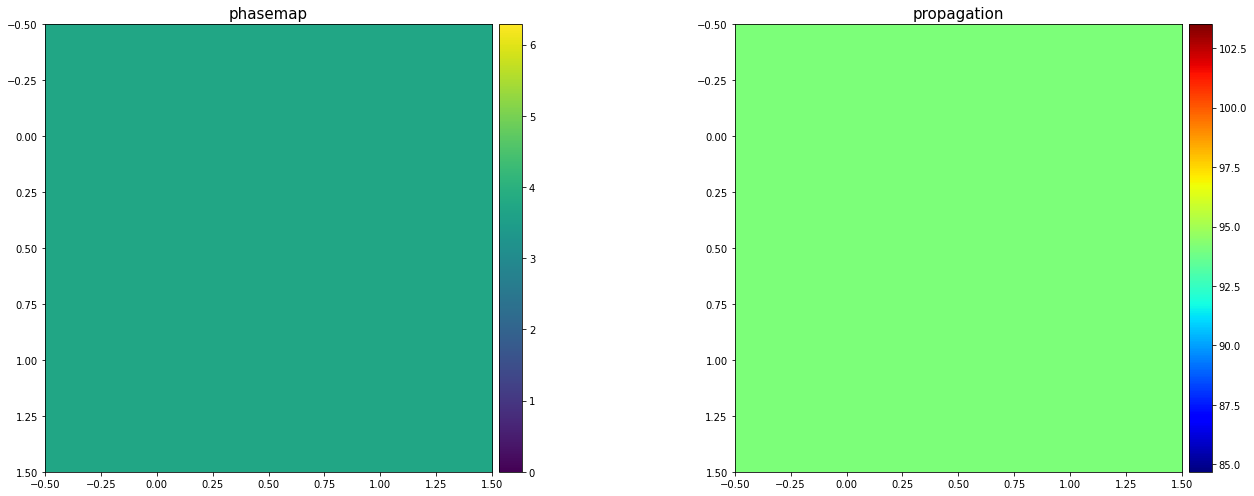

D: 0.2    T_m_n: 2 2    M_m_n: 4 4


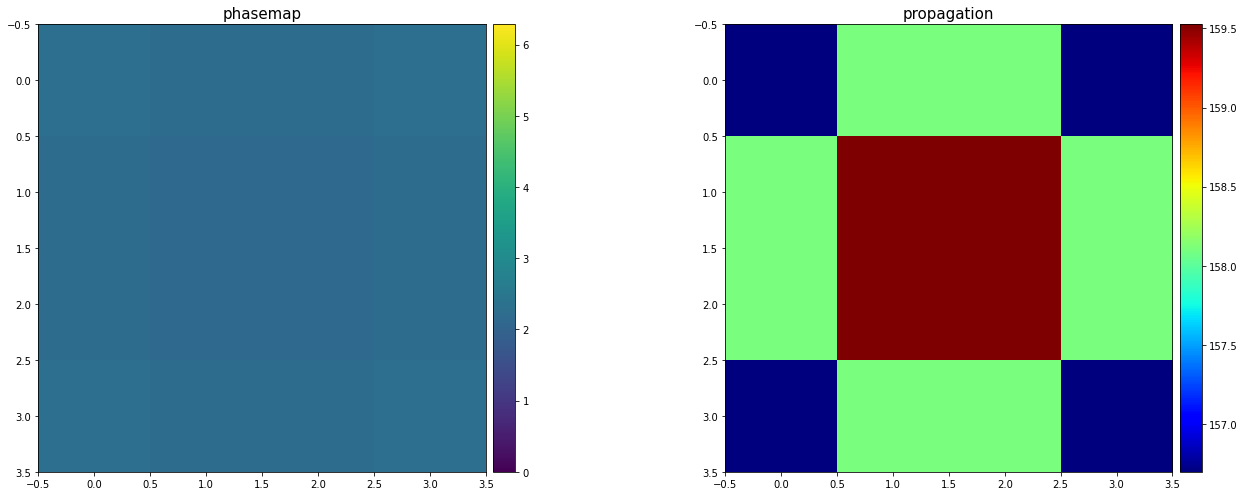

D: 0.02    T_m_n: 2 2    M_m_n: 4 4


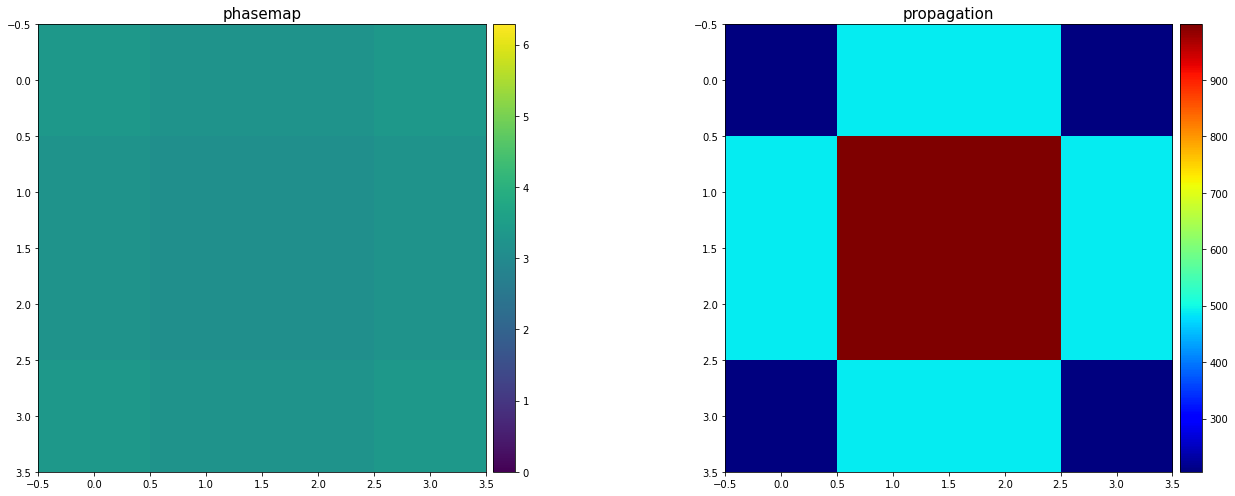

D: 0.002    T_m_n: 2 2    M_m_n: 4 4


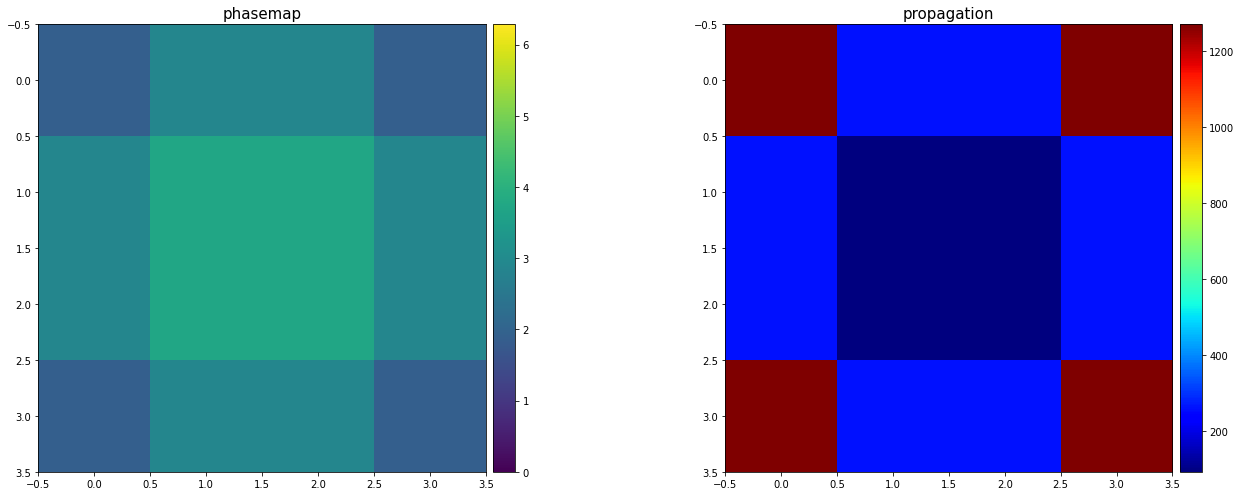

D: 0.2    T_m_n: 4 4    M_m_n: 4 4


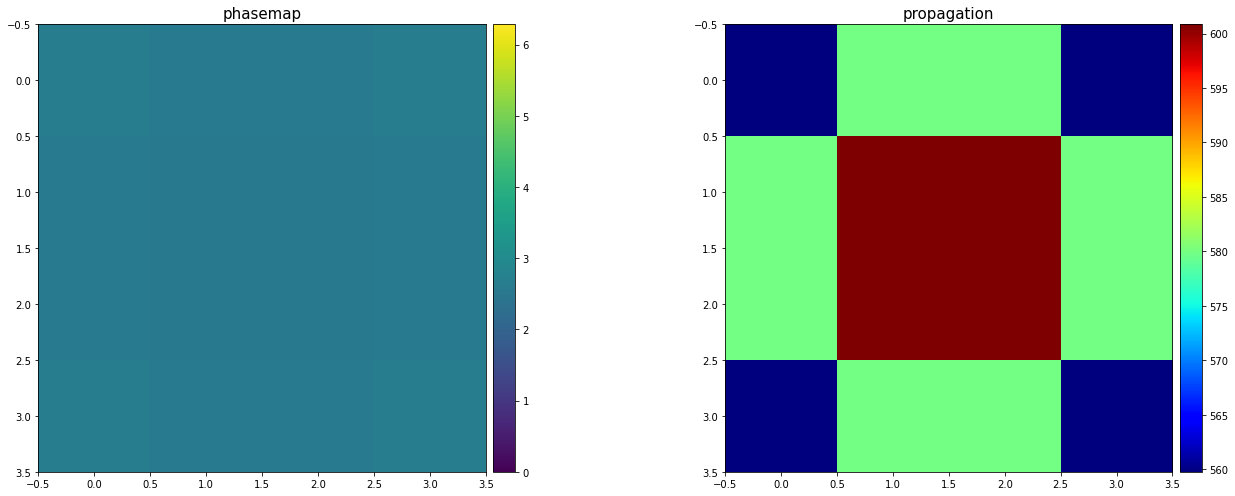

D: 0.02    T_m_n: 4 4    M_m_n: 4 4


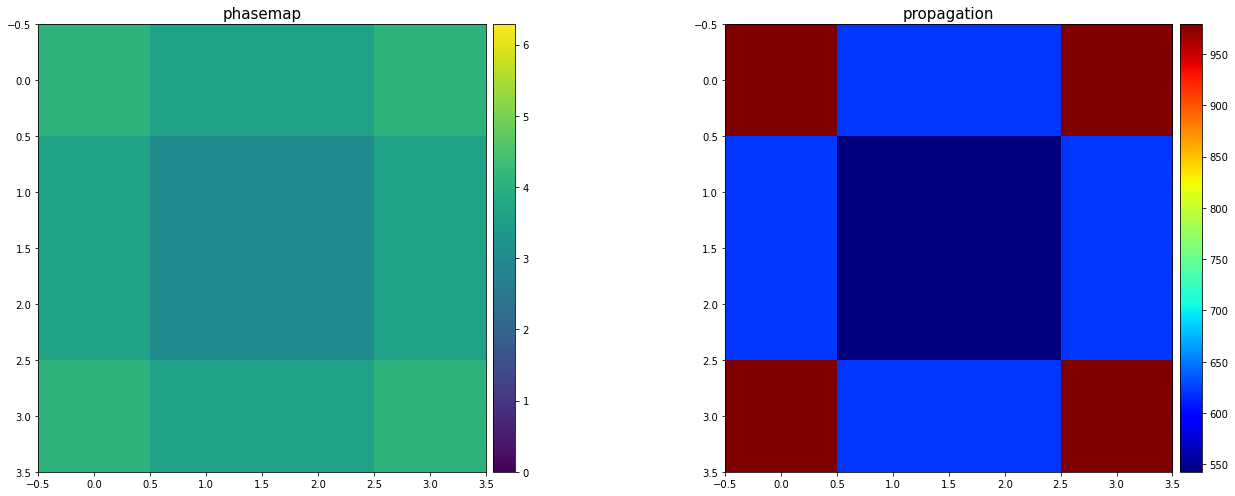

D: 0.002    T_m_n: 4 4    M_m_n: 4 4


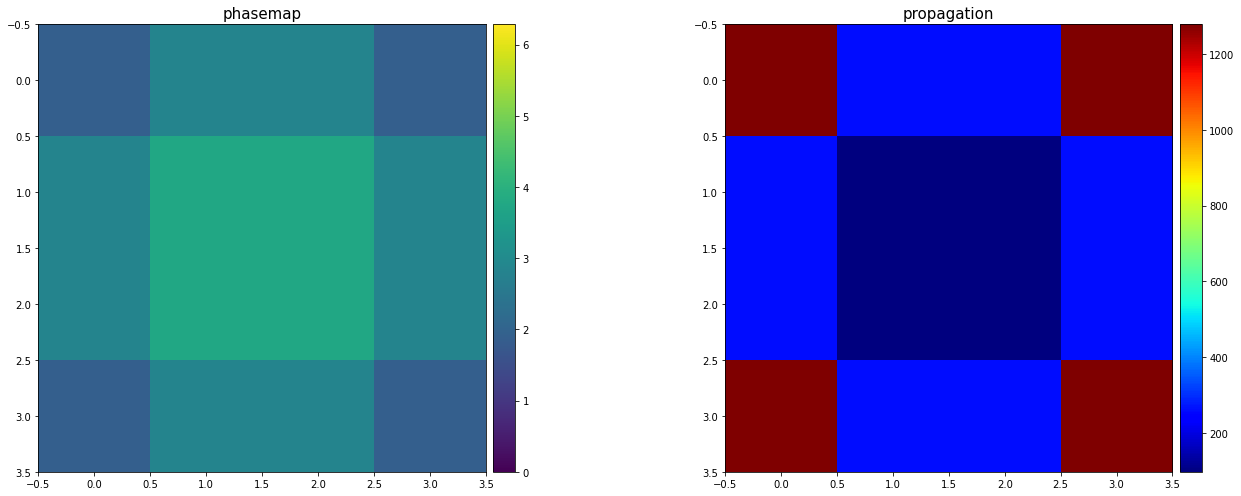

D: 0.2    T_m_n: 4 4    M_m_n: 8 8


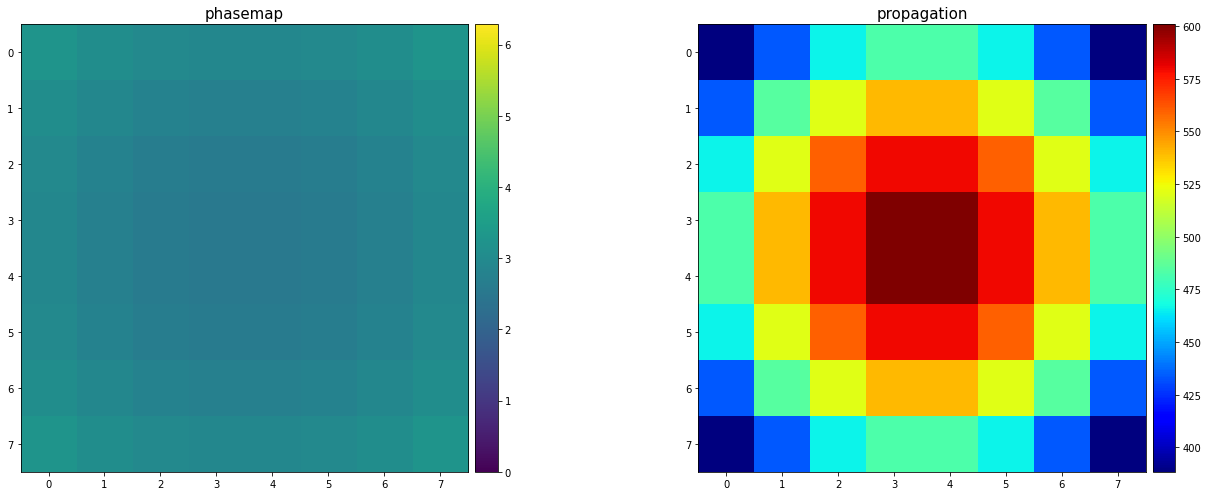

D: 0.02    T_m_n: 4 4    M_m_n: 8 8


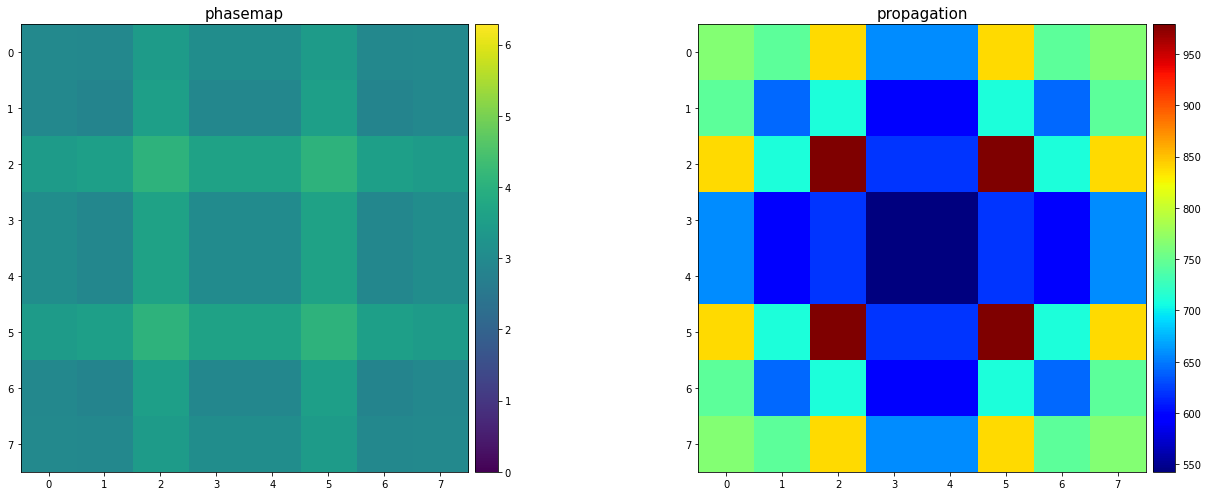

D: 0.002    T_m_n: 4 4    M_m_n: 8 8


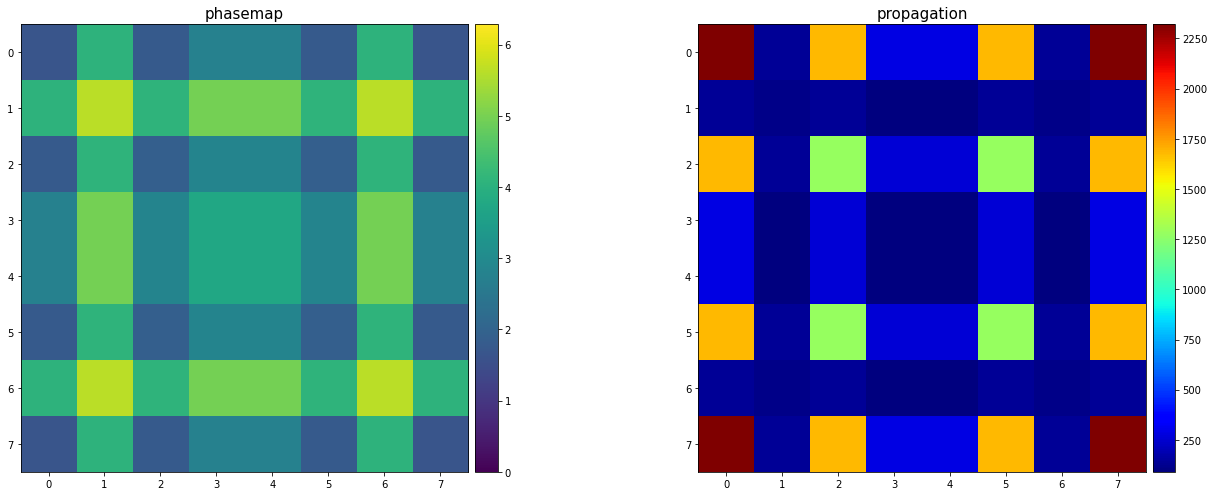

D: 0.002    T_m_n: 8 8    M_m_n: 8 8


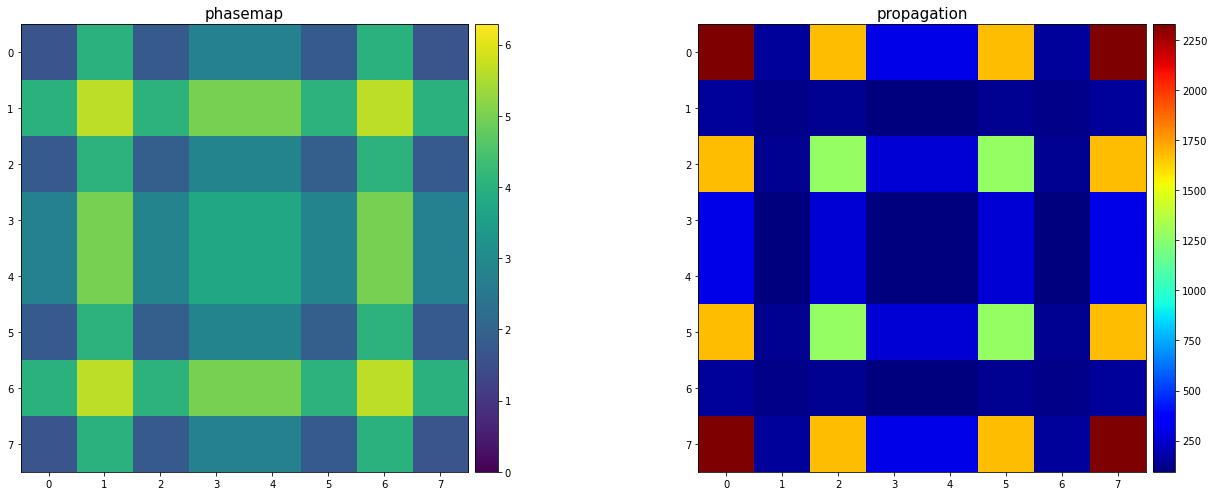

D: 0.02    T_m_n: 2 2    M_m_n: 16 16


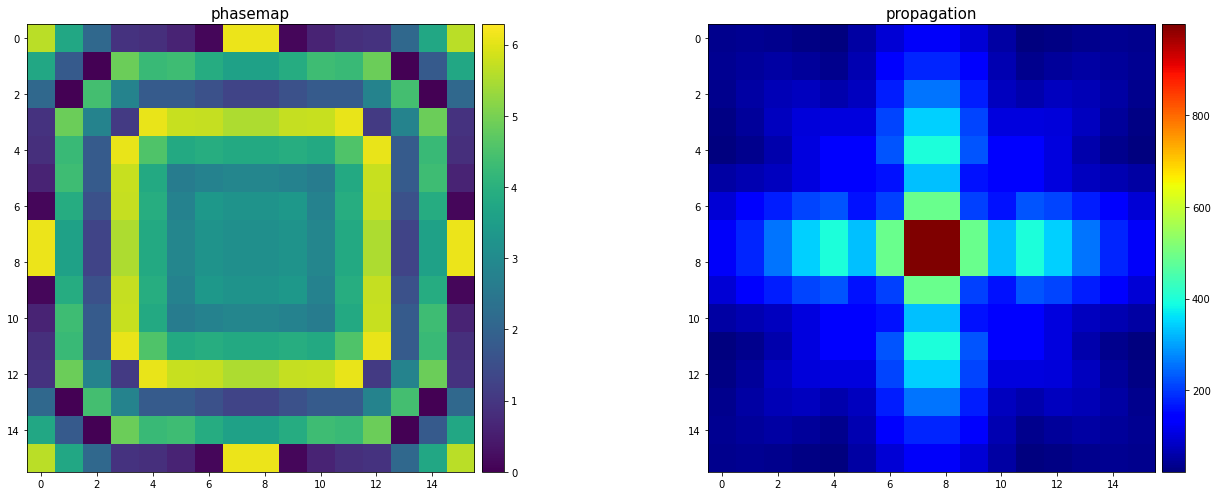

D: 0.02    T_m_n: 4 4    M_m_n: 16 16


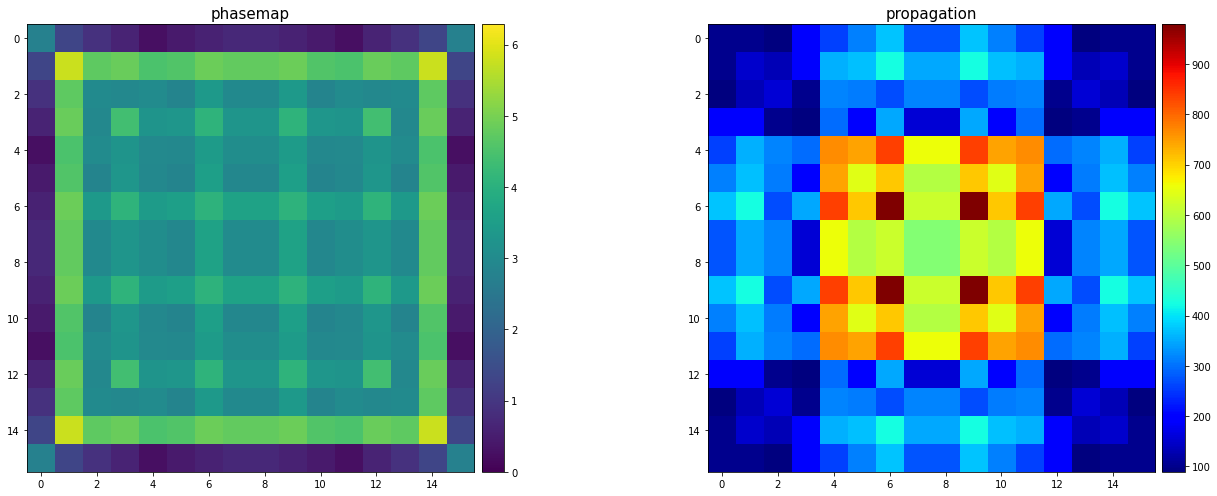

D: 0.02    T_m_n: 8 8    M_m_n: 16 16


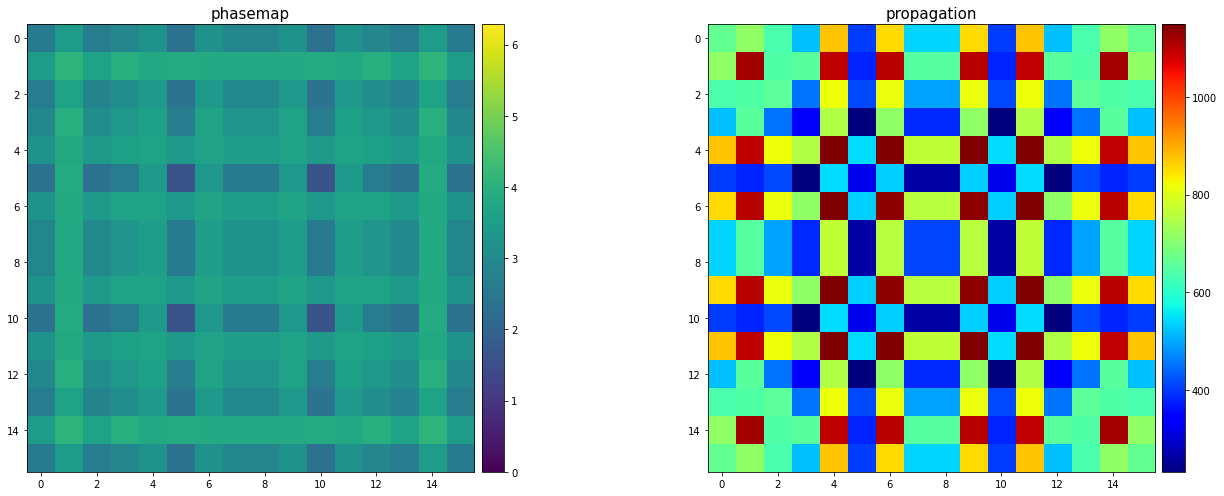

D: 0.02    T_m_n: 1 8    M_m_n: 50 50


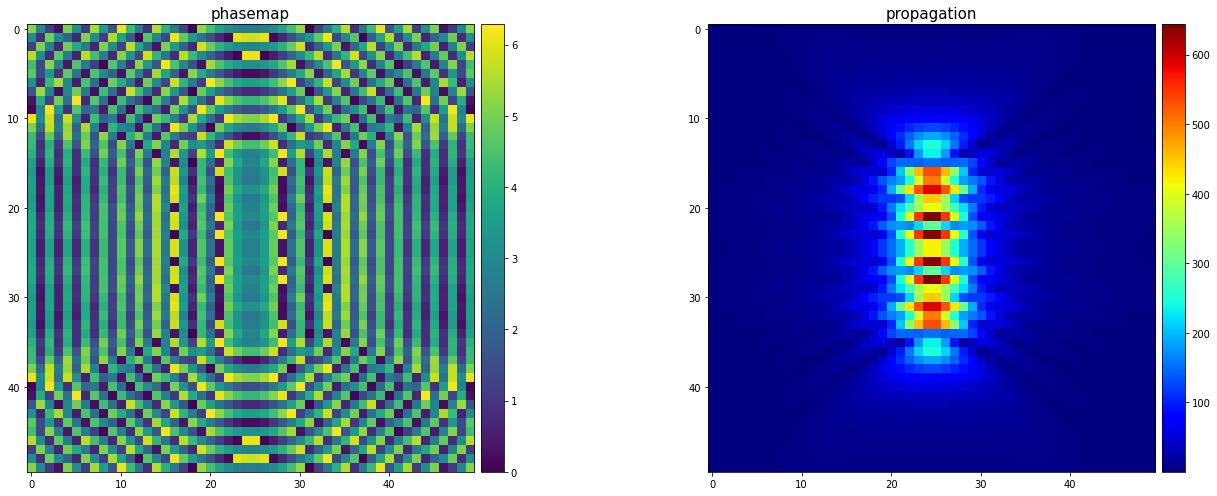

D: 0.02    T_m_n: 8 1    M_m_n: 100 100


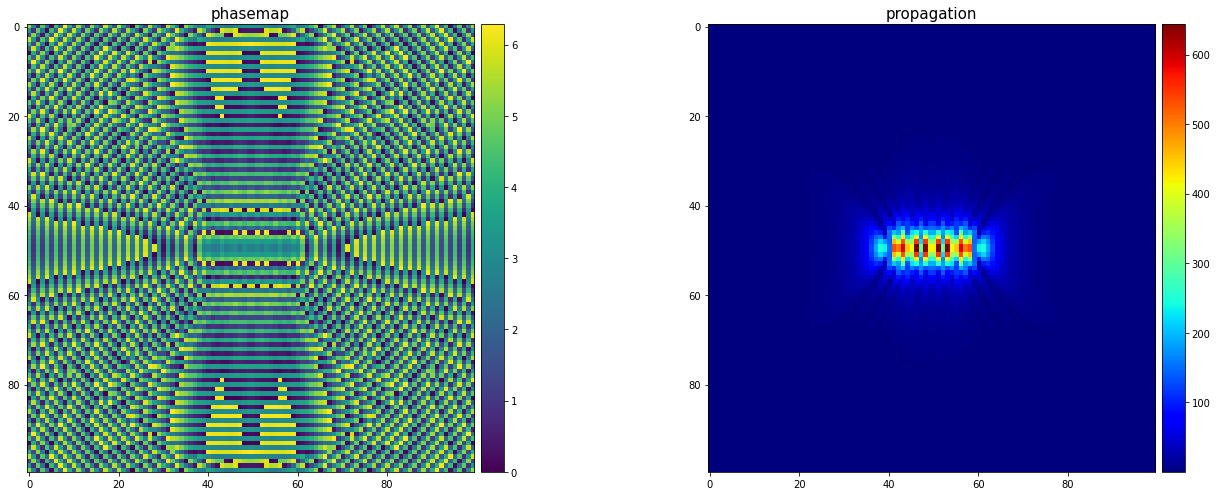

D: 0.002    T_m_n: 8 1    M_m_n: 512 512


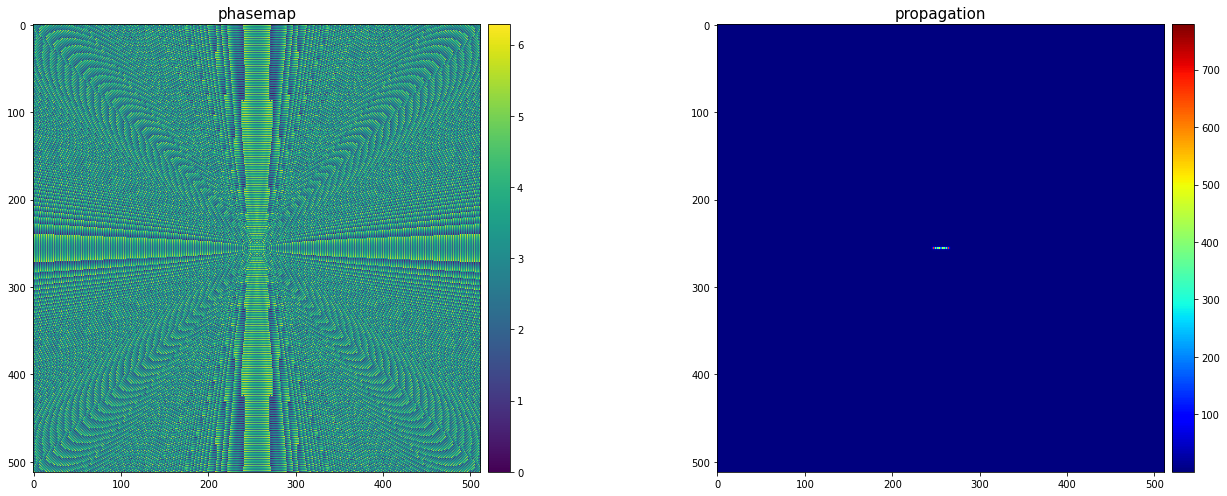

D: 0.2    T_m_n: 8 1    M_m_n: 512 512


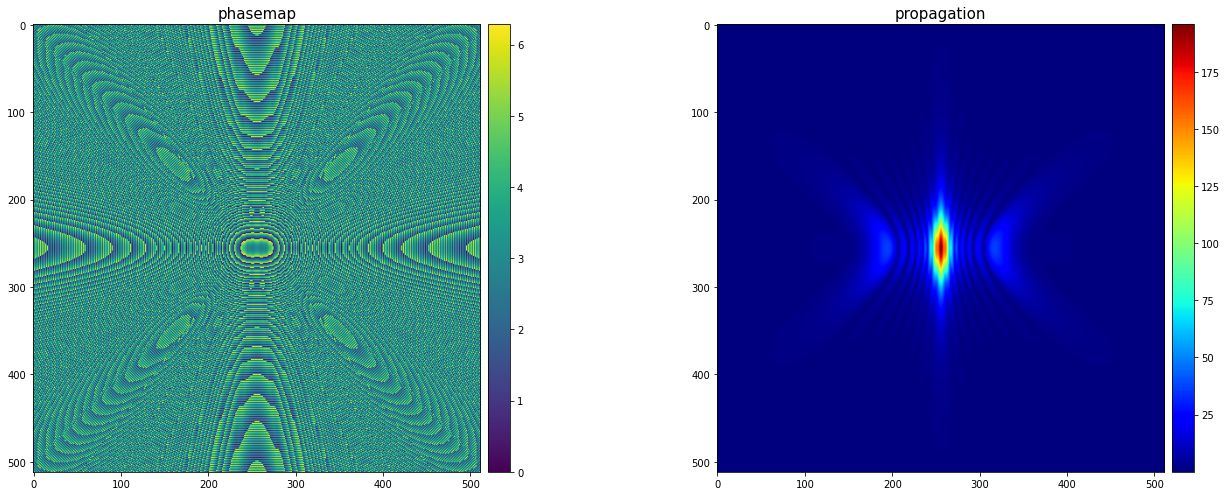

In [15]:

configs = []

config = source_configurator( 0.2,        # distance between transducer array and metasurface inlet
                              8, 1,       # transducer columns * rows configuration  
                              16, 3,      # metasurface unit cell columns * rows configuration
                              p0 = 8.02   # reference pressure
                            )
configs.append(config)

# configs.append( source_configurator(   0.2, 1, 8,  3, 16, p0 = 8.02 ) )
configs.append( source_configurator(  0.02, 8, 1, 16,  3, p0 = 8.02 ) )
# configs.append( source_configurator(  0.02, 1, 8,  3, 16, p0 = 8.02 ) )
configs.append( source_configurator(  .002, 8, 1, 16,  3, p0 = 8.02 ) )
# configs.append( source_configurator(  .002, 1, 8,  3, 16, p0 = 8.02 ) )
configs.append( source_configurator(   0.2, 1, 1,  1,  1, p0 = 8.02 ) )  
configs.append( source_configurator(   .02, 1, 1,  1,  1, p0 = 8.02 ) )  
configs.append( source_configurator(  .002, 1, 1,  1,  1, p0 = 8.02 ) )  
configs.append( source_configurator(   0.2, 1, 1,  2,  2, p0 = 8.02 ) )  
configs.append( source_configurator(   .02, 1, 1,  2,  2, p0 = 8.02 ) )  
configs.append( source_configurator(  .002, 1, 1,  2,  2, p0 = 8.02 ) )  

configs.append( source_configurator(   0.2, 2, 2,  2,  2, p0 = 8.02 ) ) 
configs.append( source_configurator(   .02, 2, 2,  2,  2, p0 = 8.02 ) ) 
configs.append( source_configurator(  .002, 2, 2,  2,  2, p0 = 8.02 ) ) 

configs.append( source_configurator(   0.2, 2, 2,  4,  4, p0 = 8.02 ) ) 
configs.append( source_configurator(   .02, 2, 2,  4,  4, p0 = 8.02 ) ) 
configs.append( source_configurator(  .002, 2, 2,  4,  4, p0 = 8.02 ) ) 

configs.append( source_configurator(   0.2, 4, 4,  4,  4, p0 = 8.02 ) ) 
configs.append( source_configurator(   .02, 4, 4,  4,  4, p0 = 8.02 ) ) 
configs.append( source_configurator(  .002, 4, 4,  4,  4, p0 = 8.02 ) ) 

configs.append( source_configurator(   0.2, 4, 4,  8,  8, p0 = 8.02 ) ) 
configs.append( source_configurator(   .02, 4, 4,  8,  8, p0 = 8.02 ) ) 
configs.append( source_configurator(  .002, 4, 4,  8,  8, p0 = 8.02 ) ) 

configs.append( source_configurator(  .002, 8, 8,  8,  8, p0 = 8.02 ) ) 
configs.append( source_configurator(  0.02, 2, 2, 16, 16, p0 = 8.02 ) )
configs.append( source_configurator(  0.02, 4, 4, 16, 16, p0 = 8.02 ) )
configs.append( source_configurator(  0.02, 8, 8, 16, 16, p0 = 8.02 ) )
configs.append( source_configurator(  0.02, 1, 8, 50, 50, p0 = 8.02 ) )
configs.append( source_configurator(  0.02, 8, 1, 100, 100, p0 = 8.02 ) )

configs.append( source_configurator(  0.002, 8, 1, 512, 512, p0 = 8.02 ) )
configs.append( source_configurator(  0.2, 8, 1, 512, 512, p0 = 8.02 ) )

for config in configs: 
  print(f"D: {config.dist}    T_m_n: {config.tm} {config.tn}    M_m_n: {config.m} {config.n}"  )
  plotter(config.Pf)